# CH1_Class4_Quant_Stock_Information

## Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Merge Data

In [4]:
#合并数据
blocks = ['huailai','xiahuayuan','zhangbei','qiaoxi']

price_df_merge = []
rent_df_merge = []

#读取文件数据
for block in blocks:
    esf_path=f'hebei_esf_{block}_data.xlsx'
    zu_path=f'hebei_zu_{block}_data.xlsx'

    #读取二手房数据
    df_price=pd.read_excel(esf_path)
    df_price['block']=block
    df_price.rename(columns={'面积(㎡)':'area','总价(万)':'total_price','均价(元/㎡)':'price_m2'}, inplace=True)
    price_df_merge.append(df_price)

    #读取租房数据
    df_rent=pd.read_excel(zu_path)
    df_rent['block']=block
    df_rent.rename(columns={'面积(㎡)':'area','租金(元/月)':'rent'},inplace=True)
    rent_df_merge.append(df_rent)

#合并所有数据
price_all=pd.concat(price_df_merge,ignore_index=True)
rent_all=pd.concat(rent_df_merge,ignore_index=True)

#计算每平方米租金
rent_all['rent_m2']=rent_all['rent']/rent_all['area']

print("数据加载完成")
print(price_all.head())
print(rent_all.head())


数据加载完成
    area  total_price  price_m2    block
0   49.0         15.0      3061  huailai
1  110.0        110.0     10000  huailai
2  118.0         45.0      3813  huailai
3   78.0         55.0      7051  huailai
4  156.9        150.0      9560  huailai
   area  rent    block    rent_m2
0    40   950  huailai  23.750000
1   104  1000  huailai   9.615385
2    87  1200  huailai  13.793103
3    78  2000  huailai  25.641026
4   175  3000  huailai  17.142857


## Data Research


### Data description

In [5]:
#price data description
print("price data description")
print(price_all.describe())

price data description
              area  total_price      price_m2
count  3013.000000  3013.000000   3013.000000
mean    103.075490    69.041925   6059.378692
std      55.356753    76.870015   3309.568711
min      20.900000     6.800000    913.000000
25%      76.440000    32.000000   4000.000000
50%      92.190000    46.000000   5219.000000
75%     116.310000    70.000000   7282.000000
max     800.000000  1500.000000  36505.000000


In [6]:
#rent data description
print("rent data description")
print(rent_all.describe())

rent data description
              area          rent      rent_m2
count  1147.000000   1147.000000  1147.000000
mean     83.216216   1127.938971    14.174625
std      31.041665    713.811092     5.840434
min      29.000000    280.000000     3.783784
25%      60.000000    833.000000    10.810811
50%      85.000000   1000.000000    12.836538
75%     100.000000   1300.000000    15.714286
max     380.000000  15000.000000    62.500000


### Detect Data Outliers

In [7]:
def detect_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=df[(df[column]<lower)|df[column]>upper]
    return len(outliers), lower, upper


n_price_out, low_p, high_p=detect_outliers(price_all,'price_m2')
n_rent_out, low_r, high_r=detect_outliers(rent_all,'rent')

print("Price outliers: ", n_price_out)
print("Rent outliers: ", n_rent_out)

Price outliers:  0
Rent outliers:  0


Then get housing price per m2 and housing rent per m2 (price/m2 and rent/m2) for each block
### 1) Data description for each block, any outliers? 2) Calculate median price to rent ratio for each block

In [8]:
#各block数据描述与异常值检测
block_ratios=[]# 用于保存每个 block 的租售比中位数

for block in blocks:
    print(f"{block}:")

    #提取对应block数值
    df_price_block=price_all[price_all['block']==block]
    df_rent_block=rent_all[rent_all['block']==block]

    #数据描述
    print("二手房价数据描述：")
    print(df_price_block[['area','price_m2']].describe())

    print("租金数据描述")
    print(df_rent_block[['area','rent_m2']].describe())

    #异常值检测
    n_price_out,low_p,high_p=detect_outliers(df_price_block,'price_m2')
    n_rent_out,low_r,high_r=detect_outliers(df_rent_block,'rent_m2')

    print(f"二手房价异常值数量:{n_price_out} （范围：{low_p:.0f} ~ {high_p:.0f}）")
    print(f"租金每平米异常值数量:{n_rent_out} （范围：{low_r:.1f} ~ {high_r:.1f}）")

    #中位数与租售比
    med_price_m2=df_price_block['price_m2'].median()
    med_rent_m2=df_rent_block['rent_m2'].median()
    ratio=med_price_m2/med_rent_m2
    block_ratios.append((block,ratio))

    print(f"中位数房价: {med_price_m2:.2f} 元/㎡")
    print(f"中位数租金: {med_rent_m2:.2f} 元/㎡")
    print(f"中位数租售比: {ratio:.2f}")



huailai:
二手房价数据描述：
              area      price_m2
count  1200.000000   1200.000000
mean    122.347867   7358.523333
std      73.332296   4254.678341
min      34.000000   2000.000000
25%      79.250000   4273.000000
50%     106.000000   6260.500000
75%     139.075000   9250.000000
max     800.000000  36505.000000
租金数据描述
             area    rent_m2
count   78.000000  78.000000
mean    97.858974  17.542056
std     55.627407   7.702936
min     35.000000   6.422018
25%     76.250000  12.204933
50%     84.000000  15.649351
75%    107.000000  19.047619
max    380.000000  47.413793
二手房价异常值数量:0 （范围：-3192 ~ 16716）
租金每平米异常值数量:0 （范围：1.9 ~ 29.3）
中位数房价: 6260.50 元/㎡
中位数租金: 15.65 元/㎡
中位数租售比: 400.05
xiahuayuan:
二手房价数据描述：
             area      price_m2
count  447.000000    447.000000
mean    94.123512   3578.948546
std     36.839535   1541.074525
min     28.520000    913.000000
25%     76.900000   2493.500000
50%     93.550000   3334.000000
75%    106.955000   4517.500000
max    276.000000  10518.00

### Draw FigureA
Figure A: Bar Plot the median price to rent ratio for each block (The global fair value should around 200)

In [9]:
ratio_df=pd.DataFrame(block_ratios,columns=['block','median_price_to_rent_ratio'])
ratio_df

,block,median_price_to_rent_ratio
0,huailai,400.048548
1,xiahuayuan,276.432774
2,zhangbei,367.866667
3,qiaoxi,434.846154


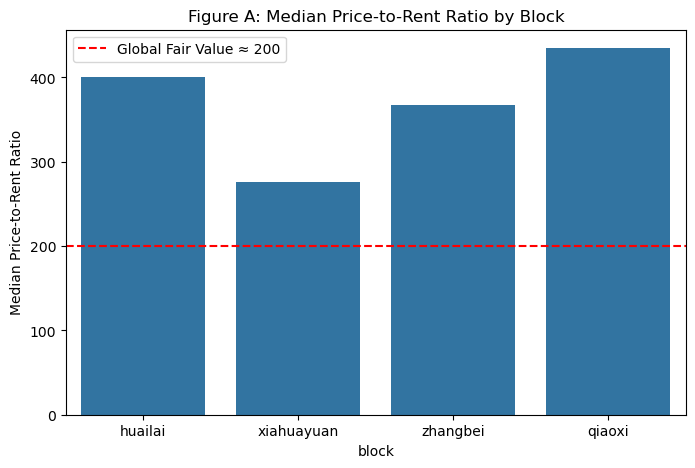

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x='block',y='median_price_to_rent_ratio',data=ratio_df)
plt.axhline(200,color='r',linestyle='--',label='Global Fair Value ≈ 200')
plt.title('Figure A: Median Price-to-Rent Ratio by Block')
plt.ylabel('Median Price-to-Rent Ratio')
plt.legend()
plt.show()

## Data Science Modeling

Model 1 price/m2i = β0m2i + β2locationi + ϵi   
Model 2 rent/m2i = β0m2i + β2locationi + ϵi  
Use model 1 and model 2 to predict price and rent for all your data and calculate price to rent ratio for each data.  
Figure B: Bar Plot the median price to rent ratio for each block

### Data Processing

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [12]:
#准备数据
data_price=price_all[['area','price_m2','block']].copy()
data_rent=rent_all[['area','rent_m2','block']].copy()

data_price
data_rent

,area,rent_m2,block
0,40,23.750000,huailai
1,104,9.615385,huailai
2,87,13.793103,huailai
3,78,25.641026,huailai
4,175,17.142857,huailai
...,...,...,...
1142,50,10.000000,qiaoxi
1143,60,10.000000,qiaoxi
1144,80,17.500000,qiaoxi
1145,65,12.307692,qiaoxi


In [13]:
#将block转换为虚拟变量（location）
data_price=pd.get_dummies(data_price,columns=['block'],drop_first=False,dtype=int)
data_rent=pd.get_dummies(data_rent,columns=['block'],drop_first=False,dtype=int)

data_price
data_rent

,area,rent_m2,block_huailai,block_qiaoxi,block_xiahuayuan,block_zhangbei
0,40,23.750000,1,0,0,0
1,104,9.615385,1,0,0,0
2,87,13.793103,1,0,0,0
3,78,25.641026,1,0,0,0
4,175,17.142857,1,0,0,0
...,...,...,...,...,...,...
1142,50,10.000000,0,1,0,0
1143,60,10.000000,0,1,0,0
1144,80,17.500000,0,1,0,0
1145,65,12.307692,0,1,0,0


In [14]:
print(data_price.columns)

Index(['area', 'price_m2', 'block_huailai', 'block_qiaoxi', 'block_xiahuayuan',
       'block_zhangbei'],
      dtype='object')


### Fitting Model 1 and Model 2 with Statsmodels
Use model 1 and model 2 to predict price and rent for all your
data.

In [15]:
#Model1：model_price
Xp=data_price.drop('price_m2', axis=1)
yp=data_price['price_m2']

model_price = sm.OLS(yp,Xp).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:               price_m2   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     248.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.63e-184
Time:                        16:17:37   Log-Likelihood:                -28264.
No. Observations:                3013   AIC:                         5.654e+04
Df Residuals:                    3008   BIC:                         5.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area                18.1511      0.986  

In [16]:
#Model2：model_rent
Xm=data_rent.drop('rent_m2', axis=1)
ym=data_rent['rent_m2']

model_rent = sm.OLS(ym, Xm).fit()
print(model_rent.summary())

                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     44.94
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.42e-35
Time:                        16:17:38   Log-Likelihood:                -3567.4
No. Observations:                1147   AIC:                             7145.
Df Residuals:                    1142   BIC:                             7170.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area                -0.0615      0.005  

In [17]:
# 预测
price_all['pred_price_m2'] = model_price.predict(Xp)
rent_all['pred_rent_m2'] = model_rent.predict(Xm)


In [18]:
price_all

,area,total_price,price_m2,block,pred_price_m2
0,49.00,15.0,3061,huailai,6027.175942
1,110.00,110.0,10000,huailai,7134.395478
2,118.00,45.0,3813,huailai,7279.604597
3,78.00,55.0,7051,huailai,6553.559000
4,156.90,150.0,9560,huailai,7985.683940
...,...,...,...,...,...
3008,52.28,40.0,7652,qiaoxi,5294.511670
3009,64.44,29.9,4640,qiaoxi,5515.229532
3010,60.43,33.0,5461,qiaoxi,5442.443461
3011,90.00,45.0,5000,qiaoxi,5979.172668


In [19]:
rent_all

,area,rent,block,rent_m2,pred_rent_m2
0,40,950,huailai,23.750000,21.099019
1,104,1000,huailai,9.615385,17.164528
2,87,1200,huailai,13.793103,18.209627
3,78,2000,huailai,25.641026,18.762915
4,175,3000,huailai,17.142857,12.799701
...,...,...,...,...,...
1142,50,500,qiaoxi,10.000000,16.349801
1143,60,600,qiaoxi,10.000000,15.735036
1144,80,1400,qiaoxi,17.500000,14.505508
1145,65,800,qiaoxi,12.307692,15.427654


### Fitting Model 1 and Model 2 with LinearRegression


In [20]:
#LinearRegression方法
#Model1
X_price = data_price.drop('price_m2', axis=1)
y_price = data_price['price_m2']

model1 = LinearRegression(fit_intercept=False)
model1.fit(X_price, y_price)
pred_price_m2 = model1.predict(X_price)

#Model2
X_rent = data_rent.drop('rent_m2', axis=1)
y_rent = data_rent['rent_m2']

model2 = LinearRegression(fit_intercept=False)
model2.fit(X_rent, y_rent)
pred_rent_m2 = model2.predict(X_rent)

In [21]:
print(pred_price_m2)
print(pred_rent_m2)
#和第一种方法一样

[6027.17594168 7134.39547759 7279.60459706 ... 5442.44346064 5979.17266845
 5728.50542598]


### Median Predicted Rent-to-Price Ratio by Block
Calculate price to rent ratio for each data.

In [23]:
#计算每个 block 的中位数预测租售比
median_ratios = []

for block in blocks:
    price_median = price_all[price_all['block'] == block]['pred_price_m2'].median()
    rent_median = rent_all[rent_all['block'] == block]['pred_rent_m2'].median()
    ratio = price_median / rent_median
    median_ratios.append((block, ratio))

median_ratios



[('huailai', 383.91700235758634),
 ('xiahuayuan', 265.0328571909939),
 ('zhangbei', 330.31440169236043),
 ('qiaoxi', 420.3874863243887)]

### Draw Figure B  
Figure B: Bar Plot the median price to rent ratio for each block.

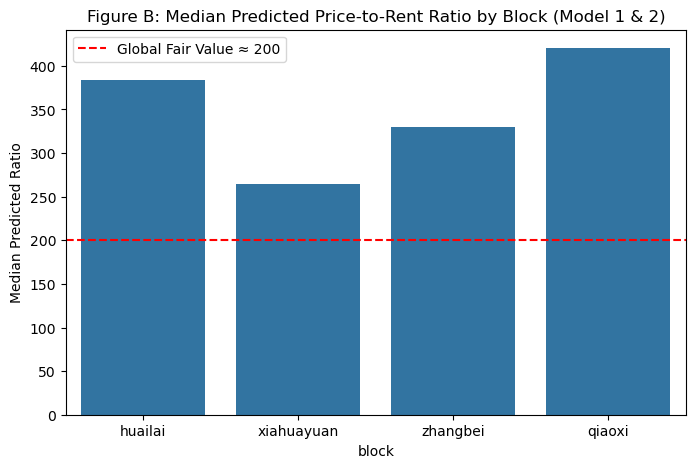

In [24]:
ratio_df_B = pd.DataFrame(median_ratios, columns=['block', 'median_predicted_ratio'])

plt.figure(figsize=(8,5))
sns.barplot(x='block', y='median_predicted_ratio', data=ratio_df_B)
plt.axhline(200, color='r', linestyle='--', label='Global Fair Value ≈ 200')
plt.title('Figure B: Median Predicted Price-to-Rent Ratio by Block (Model 1 & 2)')
plt.ylabel('Median Predicted Ratio')
plt.legend()
plt.show()

## Data Science Modeling Pro Max

### Add Features  

Add features non-linearity and interaction to Model 1 and Model 2, then get Model 1+ and Model 2+. 

In [25]:
# 为 area 添加平方项
data_price['area2'] = data_price['area'] ** 2
data_rent['area2'] = data_rent['area'] ** 2

data_price
data_rent

,area,rent_m2,block_huailai,block_qiaoxi,block_xiahuayuan,block_zhangbei,area2
0,40,23.750000,1,0,0,0,1600
1,104,9.615385,1,0,0,0,10816
2,87,13.793103,1,0,0,0,7569
3,78,25.641026,1,0,0,0,6084
4,175,17.142857,1,0,0,0,30625
...,...,...,...,...,...,...,...
1142,50,10.000000,0,1,0,0,2500
1143,60,10.000000,0,1,0,0,3600
1144,80,17.500000,0,1,0,0,6400
1145,65,12.307692,0,1,0,0,4225


In [26]:
# 获取所有 block 虚拟变量的列名
block_cols = [col for col in data_price.columns if col.startswith('block_')]
block_cols

['block_huailai', 'block_qiaoxi', 'block_xiahuayuan', 'block_zhangbei']

In [27]:
# 添加交互项：area × block
for col in block_cols:
    data_price[f'{col}_x_area'] = data_price['area'] * data_price[col]
    data_rent[f'{col}_x_area'] = data_rent['area'] * data_rent[col]
data_price
data_rent

,area,rent_m2,block_huailai,block_qiaoxi,block_xiahuayuan,block_zhangbei,area2,block_huailai_x_area,block_qiaoxi_x_area,block_xiahuayuan_x_area,block_zhangbei_x_area
0,40,23.750000,1,0,0,0,1600,40,0,0,0
1,104,9.615385,1,0,0,0,10816,104,0,0,0
2,87,13.793103,1,0,0,0,7569,87,0,0,0
3,78,25.641026,1,0,0,0,6084,78,0,0,0
4,175,17.142857,1,0,0,0,30625,175,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1142,50,10.000000,0,1,0,0,2500,0,50,0,0
1143,60,10.000000,0,1,0,0,3600,0,60,0,0
1144,80,17.500000,0,1,0,0,6400,0,80,0,0
1145,65,12.307692,0,1,0,0,4225,0,65,0,0


### Model1+
Model 1+: $ \text{price\_m2} \sim \text{area} + \text{area}^2 + \text{block} + \text{area} \times \text{block} $

In [28]:
# Model 1+ : price_m2 ~ area + area^2 + block + area×block （无截距）
Xp_plus = data_price[['area', 'area2'] + block_cols + [f'{col}_x_area' for col in block_cols]]
yp_plus = data_price['price_m2']

Xp_plus

,area,area2,block_huailai,block_qiaoxi,block_xiahuayuan,block_zhangbei,block_huailai_x_area,block_qiaoxi_x_area,block_xiahuayuan_x_area,block_zhangbei_x_area
0,49.00,2401.0000,1,0,0,0,49.0,0.00,0.0,0.0
1,110.00,12100.0000,1,0,0,0,110.0,0.00,0.0,0.0
2,118.00,13924.0000,1,0,0,0,118.0,0.00,0.0,0.0
3,78.00,6084.0000,1,0,0,0,78.0,0.00,0.0,0.0
4,156.90,24617.6100,1,0,0,0,156.9,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3008,52.28,2733.1984,0,1,0,0,0.0,52.28,0.0,0.0
3009,64.44,4152.5136,0,1,0,0,0.0,64.44,0.0,0.0
3010,60.43,3651.7849,0,1,0,0,0.0,60.43,0.0,0.0
3011,90.00,8100.0000,0,1,0,0,0.0,90.00,0.0,0.0


In [29]:
# 不加常数项
model_price_plus = sm.OLS(yp_plus, Xp_plus).fit()
print(model_price_plus.summary())

                            OLS Regression Results                            
Dep. Variable:               price_m2   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          2.59e-230
Time:                        16:38:34   Log-Likelihood:                -28147.
No. Observations:                3013   AIC:                         5.631e+04
Df Residuals:                    3004   BIC:                         5.637e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area                      

### Model2+
Model 2+: $ \text{rent\_m2} \sim \text{area} + \text{area}^2 + \text{block} + \text{area} \times \text{block} $

In [46]:
# Model 2+ : rent_m2 ~ area + area^2 + block + area×block （无截距）
Xr_plus = data_rent[['area', 'area2'] + block_cols + [f'{col}_x_area' for col in block_cols]]
yr_plus = data_rent['rent_m2']
Xr_plus
yr_plus

0       23.750000
1        9.615385
2       13.793103
3       25.641026
4       17.142857
          ...    
1142    10.000000
1143    10.000000
1144    17.500000
1145    12.307692
1146    12.000000
Name: rent_m2, Length: 1147, dtype: float64

In [47]:
model_rent_plus = sm.OLS(yr_plus, Xr_plus).fit()
print(model_rent_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     56.97
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.30e-78
Time:                        15:18:48   Log-Likelihood:                -3458.1
No. Observations:                1147   AIC:                             6934.
Df Residuals:                    1138   BIC:                             6980.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area                      

In [48]:
# 预测
price_all['pred_price_m2_plus'] = model_price_plus.predict(Xp_plus)
rent_all['pred_rent_m2_plus'] = model_rent_plus.predict(Xr_plus)

price_all

,area,total_price,price_m2,block,pred_price_m2,pred_price_m2_plus
0,49.00,15.0,3061,huailai,6027.175942,4710.010761
1,110.00,110.0,10000,huailai,7134.395478,7243.129389
2,118.00,45.0,3813,huailai,7279.604597,7540.407103
3,78.00,55.0,7051,huailai,6553.559000,5973.010847
4,156.90,150.0,9560,huailai,7985.683940,8870.458084
...,...,...,...,...,...,...
3008,52.28,40.0,7652,qiaoxi,5294.511670,6043.070847
3009,64.44,29.9,4640,qiaoxi,5515.229532,6048.846421
3010,60.43,33.0,5461,qiaoxi,5442.443461,6049.010134
3011,90.00,45.0,5000,qiaoxi,5979.172668,5999.969813


### Median Predicted Rent-to-Price Ratio by Block

In [49]:
#计算每个 block 的中位数预测租售比
median_ratios_plus = []

for block in blocks:
    price_median_plus = price_all[price_all['block'] == block]['pred_price_m2_plus'].median()
    rent_median_plus = rent_all[rent_all['block'] == block]['pred_rent_m2_plus'].median()
    ratio_plus = price_median_plus / rent_median_plus
    median_ratios_plus.append((block, ratio_plus))

median_ratios_plus



[('huailai', 429.03585756164296),
 ('xiahuayuan', 276.30837855931355),
 ('zhangbei', 340.2958853685597),
 ('qiaoxi', 442.3759063951536)]

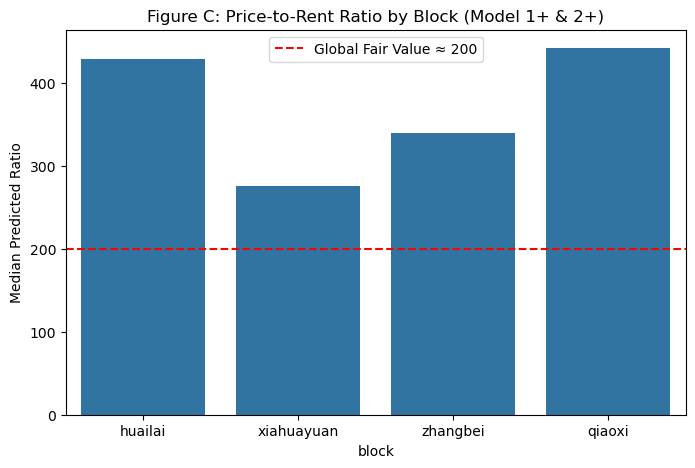

In [50]:
ratio_df_C = pd.DataFrame(median_ratios_plus, columns=['block', 'median_predicted_ratio_plus'])

plt.figure(figsize=(8,5))
sns.barplot(x='block', y='median_predicted_ratio_plus', data=ratio_df_C)
plt.axhline(200, color='r', linestyle='--', label='Global Fair Value ≈ 200')
plt.title('Figure C: Price-to-Rent Ratio by Block (Model 1+ & 2+)')
plt.ylabel('Median Predicted Ratio')
plt.legend()
plt.show()

### R² Comparison
Compare the price to rent ratio from these three methods.Compare with R2 of Model 1, Model 2 vs Model 1+ , Model 2+. Which one has higher R2 and why?

In [54]:
# 输出 R² 结果比较
print("=== R² Comparison ===")
print(f"Model 1 (Price) R²: {model_price.rsquared:.4f}")
print(f"Model 2 (Rent)  R²: {model_rent.rsquared:.4f}")
print(f"Model 1+ (Price) R²: {model_price_plus.rsquared:.4f}")
print(f"Model 2+ (Rent)  R²: {model_rent_plus.rsquared:.4f}")


=== R² Comparison ===
Model 1 (Price) R²: 0.2482
Model 2 (Rent)  R²: 0.1360
Model 1+ (Price) R²: 0.3044
Model 2+ (Rent)  R²: 0.2860


从结果看：  

Model 1+ 的 R²（0.3044）高于 Model 1（0.2482）；  

Model 2+ 的 R²（0.2860）高于 Model 2（0.1360）。  

因此，加入非线性项（area²）和交互项（area×location）后，两个模型的拟合效果都提升了。  

R² 提高的原因  

非线性特征（area²）：房价或租金与面积往往不是完全线性关系；小户型每平米价格通常更高；大户型可能存在“面积越大，单价越低”的边际效应。加入 area² 可以更准确地捕捉这种曲线关系。  

交互项（area×location）：不同区域的价格-面积关系不同：市中心可能小面积更贵（高单价）；郊区可能大面积更划算。加入交互项能让模型对每个 block 的斜率（面积效应）单独建模，捕捉空间异质性，从而提高解释力。